# ViT B16 Teacher on CIFAR10

## 1) Load and transform dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('mps')
print(device)

mps


In [3]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


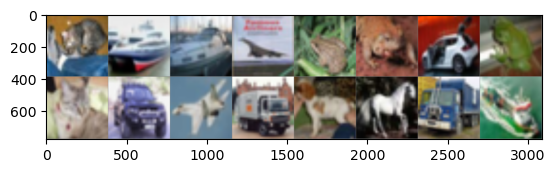

cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2) Load model

In [4]:
from torchvision.models import vit_b_16

In [5]:
 model = vit_b_16(weights='ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1')

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [7]:
model.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [8]:
sum(p.numel() for p in model.parameters() if p.requires_grad)*10e-7

86.859496

In [15]:
from models.vision_transfromer import VisionTransformer

model_2 = VisionTransformer(
    image_size=224,
    patch_size=16,
    num_layers=12,
    num_heads=12,
    hidden_dim=768,
    mlp_dim=3072,
)

TypeError: VisionTransformer.__init__() got an unexpected keyword argument 'weights'

In [12]:
model_2.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [14]:
sum(p.numel() for p in model_2.parameters() if p.requires_grad)*10e-7

86.567656

## 3) Evaluate

In [ ]:
#map imagent 1k output to cifar 10 label

In [34]:
# Classify
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch_idx, data in enumerate(testloader):
        print(batch_idx)
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


KeyboardInterrupt: 

In [13]:
vars(model)

{'training': True,
 '_parameters': OrderedDict([('class_token',
               Parameter containing:
               tensor([[[-6.0935e-02, -6.6966e-03,  2.3728e-03,  3.0948e-03, -1.6235e-03,
                         -4.7551e-03, -1.7927e-02,  2.7810e-02, -1.6783e-03,  6.8927e-02,
                          1.0916e-03, -4.2371e-03, -5.3070e-05, -8.8321e-03, -1.0318e-02,
                         -2.7353e-03, -6.0997e-03,  5.1666e-03,  1.5441e-03,  1.1170e-01,
                          1.2749e-03, -3.6791e-03, -2.7171e-03, -4.6980e-02,  9.3094e-02,
                         -5.6102e-03, -1.8693e-03,  2.6641e-02,  4.2113e-03, -4.5012e-03,
                         -4.5116e-03, -2.8833e-03, -1.0075e-02, -2.7887e-03, -5.3878e-03,
                         -4.9888e-03,  5.7173e-03,  6.2041e-03, -3.9890e-03, -1.7173e-02,
                         -4.7337e-02, -5.3883e-03,  9.8077e-02,  5.6578e-05, -2.8108e-03,
                         -3.9019e-02,  3.2007e-03,  7.2605e-03, -5.6922e-03, -3.9593e-03,